**Problem Statement** \
The problem statement involves identifying the trends in digital transactions in 2020 and 2021 in pre-covid, lockdown and unlock stages

**Data source**
https://www.rbi.org.in/Scripts/Statistics.aspx

Following datasets have been taken into consideration from January 2017 – April 2021

1. RTGS Transactions data
2. NEFT Transactions data
3. Mobile Transaction data
4. POS Transaction data


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings("ignore")
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


C:\Users\ugupta6\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Read the folder path
os.chdir(r"C:\Users\ugupta6\Desktop\Problem Statement")

In [3]:
# align the file path
pos_path = r"C:\Users\ugupta6\Desktop\Problem Statement\POS"
rtgs_path = r"C:\Users\ugupta6\Desktop\Problem Statement\RTGS_NEFT"

In [112]:
os.chdir(pos_path)
pos_files = os.listdir()
pos_files

['pos_apr_2017.XLSX',
 'pos_apr_2018.XLS',
 'pos_apr_2019.XLSX',
 'pos_apr_2020.xls',
 'pos_apr_2021.XLSX',
 'pos_aug_2017.XLSX',
 'pos_aug_2018.XLSX',
 'pos_aug_2019.XLSX',
 'pos_aug_2020.xlsx',
 'pos_dec_2017.XLSX',
 'pos_dec_2018.XLSX',
 'pos_dec_2019.XLSX',
 'pos_dec_2020.xlsx',
 'pos_feb_2017.XLSX',
 'pos_feb_2018.XLS',
 'pos_feb_2019.XLSX',
 'pos_feb_2020.xls',
 'pos_feb_2021.XLSX',
 'pos_jan_2017.XLS',
 'pos_jan_2018.XLSX',
 'pos_jan_2019.XLSX',
 'pos_Jan_2020.xls',
 'pos_jan_2021.XLSX',
 'pos_jul_2017.XLSX',
 'pos_jul_2018.XLSX',
 'pos_jul_2019.XLSX',
 'pos_jul_2020.xlsx',
 'pos_jun_2017.XLSX',
 'pos_jun_2018.XLS',
 'pos_jun_2019.XLSX',
 'pos_jun_2020.xlsx',
 'pos_mar_2017.XLSX',
 'pos_mar_2018.XLS',
 'pos_mar_2019.XLSX',
 'pos_mar_2020.xls',
 'pos_mar_2021.XLSX',
 'pos_may_2017.XLSX',
 'pos_may_2018.XLS',
 'pos_may_2019.XLSX',
 'pos_May_2020.xls',
 'pos_nov_2017.XLSX',
 'pos_nov_2018.XLSX',
 'pos_nov_2019.XLSX',
 'pos_nov_2020.XLSX',
 'pos_oct_2017.XLSX',
 'pos_oct_2018.XLSX',

**Let us Look at Raw Data How it Looks Like**

In [528]:
pos_dataframes = []
for f in pos_files:
    pos_dataframes.append(pd.read_excel(f,header = 5,index_col=0))

In [531]:
pos_dataframes[0].head()

,Unnamed: 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,ALLAHABAD BANK,825.0,389.0,608.0,0.0,0.0,0.0,0.0,0.000000,0.000000,11385423.0,6203993.0,1505777.0,17250.681656,1998.982351
2,ANDHRA BANK,3113.0,816.0,14210.0,0.0,169903.0,8312.0,328876.0,39.200000,769.900000,21832093.0,11367674.0,2785346.0,29760.000000,3421.200000
3,BANK OF BARODA,6307.0,4212.0,91863.0,0.0,132768.0,6337.0,356634.0,22.198550,1042.953766,44732042.0,15121682.0,8391734.0,66622.009957,9684.416343
4,BANK OF INDIA,3487.0,4230.0,21151.0,0.0,145860.0,11565.0,193142.0,62.580745,481.127713,47655682.0,26705533.0,7428242.0,58887.284536,8194.946552
5,BANK OF MAHARASHTRA,1291.0,588.0,1002.0,0.0,0.0,0.0,0.0,0.000000,0.000000,6513165.0,5251298.0,2077018.0,20283.540760,2894.972365


**So we can see the data is bifurcated at bank level for each month**

In [537]:
pos_dataframes[0].iloc[47:52,:]

,Unnamed: 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14
48,FIRSTRAND BANK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000
49,HONGKONG AND SHANGHAI BKG CORPN,44.0,54.0,0.0,0.0,444878.0,3237.0,1211095.0,24.446687,3768.412785,433330.0,313327.0,613877.0,1.635052e+03,1186.812541
50,ROYAL BANK OF SCOTLAND N V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000
51,STANDARD CHARTERED BANK LTD,103.0,140.0,0.0,0.0,1106750.0,3972.0,4233487.0,19.322645,9033.132269,914147.0,1502782.0,2271664.0,5.588778e+03,2866.885683
NaN,Grand Total,109740.0,98073.0,2614584.0,0.0,30374102.0,481711.0,106578071.0,2327.239239,331429.036265,780795417.0,660321091.0,272838572.0,2.168596e+06,380572.155678


#### 1. Read Data

**1.1 Read all POS Data**

In [538]:
#change directory to read files
os.chdir(pos_path)
pos_files = os.listdir()
pos_files

pos_dataframes = []
for f in pos_files:
    pos_dataframes.append(pd.read_excel(f,header=7,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],index_col=0))
    
# drop all of the rows having null values


for i in pos_dataframes:
    i.dropna(how="all",inplace=True)
    
# Keep only Total value

dfs = []
for i in pos_dataframes:
    dfs.append(i.tail(1))
    
# Reset the index of dataframe

for i in dfs:
    i.reset_index(inplace=True)

    
# rename the columns of dataframes

columns_map = ["total","no_atms_on_site","no_atms_off_site","no_pos_on_line","no_pos_off_line",
               "no_credit_cards","no_credit_card_atm_txn","no_credit_card_pos_txn","no_credit_card_atm_txn_value_in_lacs","no_credit_card_pos_txn_value_in_lacs",
               "no_debit_cards","no_debit_card_atm_txn","no_debit_card_pos_txn","no_debit_card_atm_txn_value_in_lacs","no_debit_card_pos_txn_value_in_lacs"]

for i in dfs:
    i.columns = columns_map
    i.drop(columns=["total"],inplace=True)
    i.reset_index(inplace=True)
    
pos_dataframes = []
for i in dfs:
    j = i.iloc[:,1:]
    pos_dataframes.append(j)

In [541]:
pos_dataframes[0]

,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_lacs,no_credit_card_pos_txn_value_in_lacs,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_lacs,no_debit_card_pos_txn_value_in_lacs
0,109740.0,98073.0,2614584.0,0.0,30374102.0,481711.0,106578071.0,2327.239239,331429.036265,780795417.0,660321091.0,272838572.0,2.168596e+06,380572.155678


In [115]:
#change directory to read files
os.chdir(rtgs_path)
rtgs__neft_files = os.listdir()
rtgs__neft_files

['rtgs_neft_apr_2017.XLS',
 'rtgs_neft_apr_2018.XLS',
 'rtgs_neft_apr_2019.XLSX',
 'rtgs_neft_apr_2020.XLS',
 'rtgs_neft_apr_2021.XLSX',
 'rtgs_neft_aug_2017.XLS',
 'rtgs_neft_aug_2018.XLS',
 'rtgs_neft_aug_2019.XLS',
 'rtgs_neft_aug_2020.XLSX',
 'rtgs_neft_dec_2017.XLS',
 'rtgs_neft_dec_2018.XLS',
 'rtgs_neft_dec_2019.XLS',
 'rtgs_neft_dec_2020.XLSX',
 'rtgs_neft_feb_2017.XLS',
 'rtgs_neft_feb_2018.XLS',
 'rtgs_neft_feb_2019.XLS',
 'rtgs_neft_feb_2020.xls',
 'rtgs_neft_feb_2021.XLS',
 'rtgs_neft_jan_2017.XLS',
 'rtgs_neft_jan_2018.XLSX',
 'rtgs_neft_jan_2019.XLS',
 'rtgs_neft_jan_2020.xls',
 'rtgs_neft_jan_2021.XLS',
 'rtgs_neft_jul_2017.XLS',
 'rtgs_neft_jul_2018.XLS',
 'rtgs_neft_jul_2019.XLS',
 'rtgs_neft_jul_2020.XLS',
 'rtgs_neft_jun_2017.XLS',
 'rtgs_neft_jun_2018.XLS',
 'rtgs_neft_jun_2019.XLS',
 'rtgs_neft_jun_2020.XLS',
 'rtgs_neft_mar_2017.XLS',
 'rtgs_neft_mar_2018.XLSX',
 'rtgs_neft_mar_2019.XLS',
 'rtgs_neft_mar_2020.xls',
 'rtgs_neft_mar_2021.XLS',
 'rtgs_neft_may_2017.X

**1.2 Read All NEFT Dataframes**

In [116]:
neft_dataframes = []
for f in rtgs__neft_files:
    neft_dataframes.append(pd.read_excel(f,header=3,index_col=None,sheet_name="NEFT",))
    
# drop the last 2 rows of the dataframe

for i in neft_dataframes:
    i.drop(i.tail(1).index,inplace=True)
    
for i in neft_dataframes:
    i.drop(columns = i.columns[0],inplace=True)

# Keep only Total value

dfs = []
for i in neft_dataframes:
    dfs.append(i.tail(1))

neft_map = ["total","no_debit_tx","amt_debit_tx","no_credit_tx","amt_credit_tx"]

for i in dfs:
    i.columns = neft_map
    i.drop(columns=["total"],inplace=True)
    i.reset_index(inplace=True)
    
neft_dataframes = []
for i in dfs:
    j = i.iloc[:,1:]
    neft_dataframes.append(j)

In [117]:
neft_dataframes[0]

,no_debit_tx,amt_debit_tx,no_credit_tx,amt_credit_tx
0,143169413.0,1.215617e+07,143169413.0,1.215617e+07


**1.3 Read all RTGS Data**

In [118]:
rtgs_dataframes = []
for f in rtgs__neft_files:
    rtgs_dataframes.append(pd.read_excel(f,header=4,index_col=0,sheet_name="RTGS"))

# Keep only Total value

dfs = []
for i in rtgs_dataframes:
    dfs.append(i.tail(1))
    
rtgs_map = ["total",
            "no_credit_tx_interbank","no_credit_tx_custmr","no_credit_tx_total","%_of_no_total_credit_tx",
            "amt_credit_tx_interbank_in_cr","amt_credit_tx_custmr_in_cr","amt_credit_tx_total_in_cr","%_of_amt_total_credit_tx",
            "no_debit_tx_interbank","no_debit_tx_custmr","no_debit_tx_total","%_of_no_total_debit_tx",
            "amt_debit_tx_interbank_in_cr","amt_debit_tx_custmr_in_cr","amt_debit_tx_total_in_cr","%_of_amt_total_debit_tx"]

for i in dfs:
    i.columns = rtgs_map
    i.drop(columns=["total"],inplace=True)
    i.reset_index(inplace=True)
    
rtgs_dataframes = []
for i in dfs:
    j = i.iloc[:,1:]
    rtgs_dataframes.append(j)
 

In [542]:
rtgs_dataframes[0]

,no_credit_tx_interbank,no_credit_tx_custmr,no_credit_tx_total,%_of_no_total_credit_tx,amt_credit_tx_interbank_in_cr,amt_credit_tx_custmr_in_cr,amt_credit_tx_total_in_cr,%_of_amt_total_credit_tx,no_debit_tx_interbank,no_debit_tx_custmr,no_debit_tx_total,%_of_no_total_debit_tx,amt_debit_tx_interbank_in_cr,amt_debit_tx_custmr_in_cr,amt_debit_tx_total_in_cr,%_of_amt_total_debit_tx
0,311728.0,9231352.0,9543080,100.0,14908.490512,73603.695388,88512.1859,100.0,311728.0,9231352.0,9543080.0,100.0,14908.490512,73603.695388,88512.1859,100.0


**1.4 Read all Mobile Banking Data**

In [120]:
mobile_dataframes = []
for f in rtgs__neft_files:
    mobile_dataframes.append(pd.read_excel(f,header=3,index_col=None,sheet_name="Mobile"))
    
for i in mobile_dataframes:
    i.drop(columns = i.columns[0],inplace=True)

# drop the wrong last rows of the dataframe

for i in mobile_dataframes:
    i.drop(i.tail(3).index,inplace=True)
    
# Keep only Total value

dfs = []
for i in mobile_dataframes:
    dfs.append(i.tail(1))
    
mobile_map = ["total","no_mobile_tx","value_mobile_tx"]

for i in dfs:
    i.columns = mobile_map
    i.drop(columns=["total"],inplace=True)
    i.reset_index(inplace=True)
    
mobile_dataframes = []
for i in dfs:
    j = i.iloc[:,1:]
    mobile_dataframes.append(j)

In [121]:
mobile_dataframes[0]

,no_mobile_tx,value_mobile_tx
0,106273573.0,1.612654e+09


#### 2.  Combine the data of all Months each for POS, NEFT, RTGS and Mobile Transactions**

In [181]:
# Merge each month level dataframe into Single Dataframe

pos_df = pd.concat([i for i in pos_dataframes],ignore_index=True)


neft_df = pd.concat([i for i in neft_dataframes],ignore_index=True)


rtgs_df = pd.concat([i for i in rtgs_dataframes],ignore_index=True)
                    
mobile_df = pd.concat([i for i in mobile_dataframes],ignore_index=True)

In [123]:
print("Final Shape of POS Dataframe is {}".format(pos_df.shape))
print("Final Shape of NEFT Dataframe is {}".format(neft_df.shape))
print("Final Shape of RTGS Dataframe is {}".format(rtgs_df.shape))
print("Final Shape of Mobile Dataframe is {}".format(mobile_df.shape))

Final Shape of POS Dataframe is (52, 14)
Final Shape of NEFT Dataframe is (52, 4)
Final Shape of RTGS Dataframe is (52, 16)
Final Shape of Mobile Dataframe is (52, 2)


**3. Read the names of Dataframes and clean that**

In [182]:
# Read the names of dataframes
df_names = []
for i in pos_files:
    j = i.lower()
    k = j.replace(".xlsx","")
    l = k.replace(".xls","")
    m = l.replace("pos_","")
    df_names.append(m)
print(df_names)

['apr_2017', 'apr_2018', 'apr_2019', 'apr_2020', 'apr_2021', 'aug_2017', 'aug_2018', 'aug_2019', 'aug_2020', 'dec_2017', 'dec_2018', 'dec_2019', 'dec_2020', 'feb_2017', 'feb_2018', 'feb_2019', 'feb_2020', 'feb_2021', 'jan_2017', 'jan_2018', 'jan_2019', 'jan_2020', 'jan_2021', 'jul_2017', 'jul_2018', 'jul_2019', 'jul_2020', 'jun_2017', 'jun_2018', 'jun_2019', 'jun_2020', 'mar_2017', 'mar_2018', 'mar_2019', 'mar_2020', 'mar_2021', 'may_2017', 'may_2018', 'may_2019', 'may_2020', 'nov_2017', 'nov_2018', 'nov_2019', 'nov_2020', 'oct_2017', 'oct_2018', 'oct_2019', 'oct_2020', 'sep_2017', 'sep_2018', 'sep_2019', 'sep_2020']


In [125]:
len(df_names)

52

In [210]:
join1 = pd.concat([pos_df,neft_df],join="inner",axis=1)
join2 = pd.concat([join1,rtgs_df],join="inner",axis=1)
final_df = pd.concat([join2,mobile_df],join="inner",axis=1)

final_df["Month_Yr"] = df_names   # assign the correct dataframe names
print(final_df.shape)

(52, 37)


**4. Final Dataframe**

In [211]:
#Change the order of indexes
final_df.set_index("Month_Yr",inplace=True)
final_df = final_df.reindex(index=['jan_2017','feb_2017','mar_2017','apr_2017','may_2017','jun_2017','jul_2017','aug_2017',
                                   'sep_2017','oct_2017','nov_2017','dec_2017','jan_2018','feb_2018','mar_2018','apr_2018',
                                   'may_2018','jun_2018','jul_2018','aug_2018',
                                   'sep_2018','oct_2018','nov_2018','dec_2018','jan_2019','feb_2019','mar_2019','apr_2019',
                                   'may_2019','jun_2019','jul_2019','aug_2019','sep_2019','oct_2019','nov_2019','dec_2019',
                                   'jan_2020','feb_2020','mar_2020','apr_2020','may_2020','jun_2020','jul_2020','aug_2020',
                                   'sep_2020','oct_2020','nov_2020','dec_2020','jan_2021','feb_2021','mar_2021','apr_2021'])
final_df.reset_index(inplace=True)

In [212]:
final_df.head()

,Month_Yr,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_lacs,no_credit_card_pos_txn_value_in_lacs,...,no_debit_tx_interbank,no_debit_tx_custmr,no_debit_tx_total,%_of_no_total_debit_tx,amt_debit_tx_interbank_in_cr,amt_debit_tx_custmr_in_cr,amt_debit_tx_total_in_cr,%_of_amt_total_debit_tx,no_mobile_tx,value_mobile_tx
0,jan_2017,108403.0,98206.0,2013601.0,2246.0,2.88459e+07,440618.0,112802575.0,1539.248767,327082.479038,...,348809.0,8981696.0,9330505.0,100.0,8622.423887,68863.648331,77486.072218,100.0,106127679.0,1.383054e+09
1,feb_2017,109001.0,98401.0,2222179.0,2798.0,2.90787e+07,423716.0,94926631.0,1909.810116,287042.291469,...,305622.0,8798563.0,9104185.0,100.0,7836.504700,66382.306839,74218.811539,100.0,95414809.0,1.279933e+09
2,mar_2017,109809.0,98545.0,2526342.0,2799.0,2.98422e+07,489248.0,107610258.0,2291.200531,333904.925245,...,393888.0,12144193.0,12538081.0,100.0,11550.820671,111825.014104,123375.834775,100.0,113650251.0,1.730881e+09
3,apr_2017,109740.0,98073.0,2614584.0,0.0,3.03741e+07,481711.0,106578071.0,2327.239239,331429.036265,...,311728.0,9231352.0,9543080.0,100.0,14908.490512,73603.695388,88512.185900,100.0,106273573.0,1.612654e+09
4,may_2017,110116.0,98360.0,2692986.0,0.0,3.08562e+07,546400.0,115330492.0,2609.027569,361406.837781,...,347481.0,10085516.0,10432997.0,100.0,9453.903605,80716.620930,90170.524536,100.0,1140945.0,1.049036e+07


In [213]:
# Create Date column

final_df["Month"] = final_df.Month_Yr.str.split("_").str[0]
look_up = {'jan': "01", 'feb' : '02', 'mar' : '03', 'apr' : '04', 'may' : '05', 'jun' : '06', 'jul': '07', 'aug' : '08',
           'sep' : '09', 'oct' : '10', 'nov': '11', 'dec': '12'}
final_df["Month"] = final_df["Month"].apply(lambda x : look_up[x])
final_df["Year"] = final_df.Month_Yr.str.split("_").str[1]

#Create the Date column
final_df['Date'] = pd.to_datetime(final_df[['Year', 'Month']].assign(DAY=1))
final_df.drop(columns=["Month_Yr","Month","Year"],inplace=True)
final_df.head()

,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_lacs,no_credit_card_pos_txn_value_in_lacs,no_debit_cards,...,no_debit_tx_custmr,no_debit_tx_total,%_of_no_total_debit_tx,amt_debit_tx_interbank_in_cr,amt_debit_tx_custmr_in_cr,amt_debit_tx_total_in_cr,%_of_amt_total_debit_tx,no_mobile_tx,value_mobile_tx,Date
0,108403.0,98206.0,2013601.0,2246.0,2.88459e+07,440618.0,112802575.0,1539.248767,327082.479038,778565537.0,...,8981696.0,9330505.0,100.0,8622.423887,68863.648331,77486.072218,100.0,106127679.0,1.383054e+09,2017-01-01
1,109001.0,98401.0,2222179.0,2798.0,2.90787e+07,423716.0,94926631.0,1909.810116,287042.291469,759421228.0,...,8798563.0,9104185.0,100.0,7836.504700,66382.306839,74218.811539,100.0,95414809.0,1.279933e+09,2017-02-01
2,109809.0,98545.0,2526342.0,2799.0,2.98422e+07,489248.0,107610258.0,2291.200531,333904.925245,771649172.0,...,12144193.0,12538081.0,100.0,11550.820671,111825.014104,123375.834775,100.0,113650251.0,1.730881e+09,2017-03-01
3,109740.0,98073.0,2614584.0,0.0,3.03741e+07,481711.0,106578071.0,2327.239239,331429.036265,780795417.0,...,9231352.0,9543080.0,100.0,14908.490512,73603.695388,88512.185900,100.0,106273573.0,1.612654e+09,2017-04-01
4,110116.0,98360.0,2692986.0,0.0,3.08562e+07,546400.0,115330492.0,2609.027569,361406.837781,790357565.0,...,10085516.0,10432997.0,100.0,9453.903605,80716.620930,90170.524536,100.0,1140945.0,1.049036e+07,2017-05-01


In [128]:
os.chdir(r"C:\Users\ugupta6\Desktop\Problem Statement")
final_df.to_excel("final_dataframe.xlsx")

In [216]:
final_df.to_excel("xyz.xlsx")

**5. Exploratory Data Analysis**

In [2]:
final_df = pd.read_excel("final_payments_dataframe.xlsx",na_values="nan",index_col=0)
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2017-01-01 to 2021-04-01
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_atms_on_site                       52 non-null     int64  
 1   no_atms_off_site                      52 non-null     int64  
 2   no_pos_on_line                        52 non-null     int64  
 3   no_pos_off_line                       52 non-null     int64  
 4   no_credit_cards                       52 non-null     int64  
 5   no_credit_card_atm_txn                52 non-null     int64  
 6   no_credit_card_pos_txn                52 non-null     int64  
 7   no_credit_card_atm_txn_value_in_lacs  52 non-null     float64
 8   no_credit_card_pos_txn_value_in_lacs  52 non-null     float64
 9   no_debit_cards                        52 non-null     int64  
 10  no_debit_card_atm_txn                 52 non-null     float64
 11  n

**5.1 Drop Irrelavant Variables**

In [3]:
final_df.columns

Index(['no_atms_on_site', 'no_atms_off_site', 'no_pos_on_line',
       'no_pos_off_line', 'no_credit_cards', 'no_credit_card_atm_txn',
       'no_credit_card_pos_txn', 'no_credit_card_atm_txn_value_in_lacs',
       'no_credit_card_pos_txn_value_in_lacs', 'no_debit_cards',
       'no_debit_card_atm_txn', 'no_debit_card_pos_txn',
       'no_debit_card_atm_txn_value_in_lacs',
       'no_debit_card_pos_txn_value_in_lacs', 'no_debit_tx', 'amt_debit_tx',
       'no_credit_tx', 'amt_credit_tx', 'no_credit_tx_interbank',
       'no_credit_tx_custmr', 'no_credit_tx_total', '%_of_no_total_credit_tx',
       'amt_credit_tx_interbank_in_cr', 'amt_credit_tx_custmr_in_cr',
       'amt_credit_tx_total_in_cr', '%_of_amt_total_credit_tx',
       'no_debit_tx_interbank', 'no_debit_tx_custmr', 'no_debit_tx_total',
       '%_of_no_total_debit_tx', 'amt_debit_tx_interbank_in_cr',
       'amt_debit_tx_custmr_in_cr', 'amt_debit_tx_total_in_cr',
       '%_of_amt_total_debit_tx', 'no_mobile_tx', 'value_mobile_

In [4]:
# This value is zero mostly, so this variable is of no use
final_df["no_pos_off_line"].unique()

array([2246, 2798, 2799,    0], dtype=int64)

In [5]:
# Check for all columns in similar way
for i in final_df:
    print(i,final_df[i].unique())

no_atms_on_site [108403 109001 109809 109740 110116 110385 110146 109232 110196 109949
 109860 109908 107659 107630 106776 104011 107230 108202 108375 107914
 108197 106852 106664 106412 106741 106562 106380 109644 109718 109310
 109660 109846 109419 110425 112255 112458 112944 113393 113271 112876
 113210 113350 113577 112968 113981 114285 114475 114045 114588 114388
 115605 115775]
no_atms_off_site [ 98206  98401  98545  98073  98360  98092  98060  98879  97179  96844
  96834  97128  99080  99029 100276 101173  99759  98207  97879  97751
  97669  97327  97254  96854  96717  96280  95816  97487  97101  96892
  97120  97298  97170  97318  97350  97181  97319  97448  97489  97205
  96412  96142  96068  95596  94807  94435  94756  95452  97970  98684]
no_pos_on_line [2013601 2222179 2526342 2614584 2692986 2776949 2840113 2882422 2900038
 2958301 2998733 3027382 3061817 3079487 3083067 3193356 3247096 3311184
 3268817 3332484 3393396 3450355 3510859 3595912 3657596 3636851 3722229
 37576

In [6]:
final_df.drop(columns=["no_pos_off_line","%_of_no_total_credit_tx","%_of_amt_total_credit_tx","%_of_no_total_debit_tx",
                      "%_of_amt_total_debit_tx"],inplace=True)
final_df.shape

(52, 31)

**5.2 Drop Highly Correlated Variables**

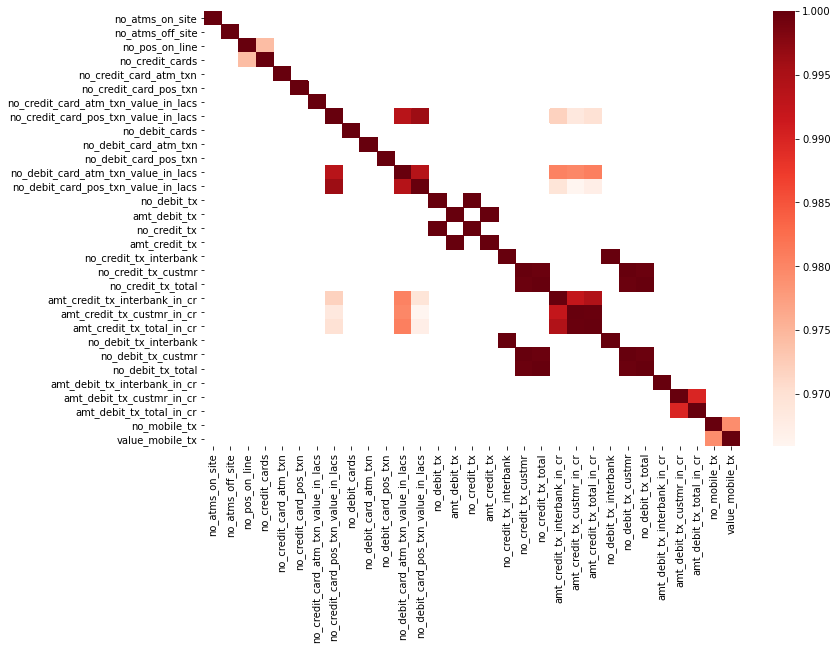

In [7]:
# calculate the correlation matrix
corr = final_df.corr()

# plot the heatmap
plt.figure(figsize=(12,8))
kot = corr[corr>=.95]
sns.heatmap(kot, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap = "Reds")

In [8]:
# Drop features where correlation is >0.95

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False
selected_columns = final_df.columns[columns]
new_final_df = final_df[selected_columns]
new_final_df.head()

,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_lacs,no_credit_card_pos_txn_value_in_lacs,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_tx,amt_debit_tx,no_credit_tx_interbank,no_credit_tx_custmr,amt_debit_tx_interbank_in_cr,amt_debit_tx_custmr_in_cr,no_mobile_tx
Date,,,,,,,,,,,,,,,,,
2017-01-01,108403,98206,2013601,440618,112802575,1539.248767,327082.479038,778565537,712347249.0,328623459,164187826,1.135508e+07,348809,8981696,8.622424e+05,6.886365e+06,106127679.0
2017-02-01,109001,98401,2222179,423716,94926631,1909.810116,287042.291469,759421228,692567162.0,251749506,148205456,1.087791e+07,305622,8798563,7.836505e+05,6.638231e+06,95414809.0
2017-03-01,109809,98545,2526342,489248,107610258,2291.200531,333904.925245,771649172,710108656.0,271172292,186703464,1.629450e+07,393888,12144193,1.155082e+06,1.118250e+07,113650251.0
2017-04-01,109740,98073,2614584,481711,106578071,2327.239239,331429.036265,780795417,660321091.0,272838572,143169413,1.215617e+07,311728,9231352,1.490849e+06,7.360370e+06,106273573.0
2017-05-01,110116,98360,2692986,546400,115330492,2609.027569,361406.837781,790357565,655471690.0,269845687,155820284,1.241081e+07,347481,10085516,9.453904e+05,8.071662e+06,114257226.0


**5.3 Check the Trend of Variables as per Pre-Covid, Lockdown and Unlock Stages**

**Pre Lockdown : Before April 2021 \
Lockdown : April 2021 - May 2021 \
Unlock : June 2021 Afterwards**

**5.3.1 No. of ATMS**

[Text(0, 0.5, 'No. of ATMs'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'No. of ATMs Deployed by Bank Onsite and Offsite\nJan 2017 - Apr 2021')]

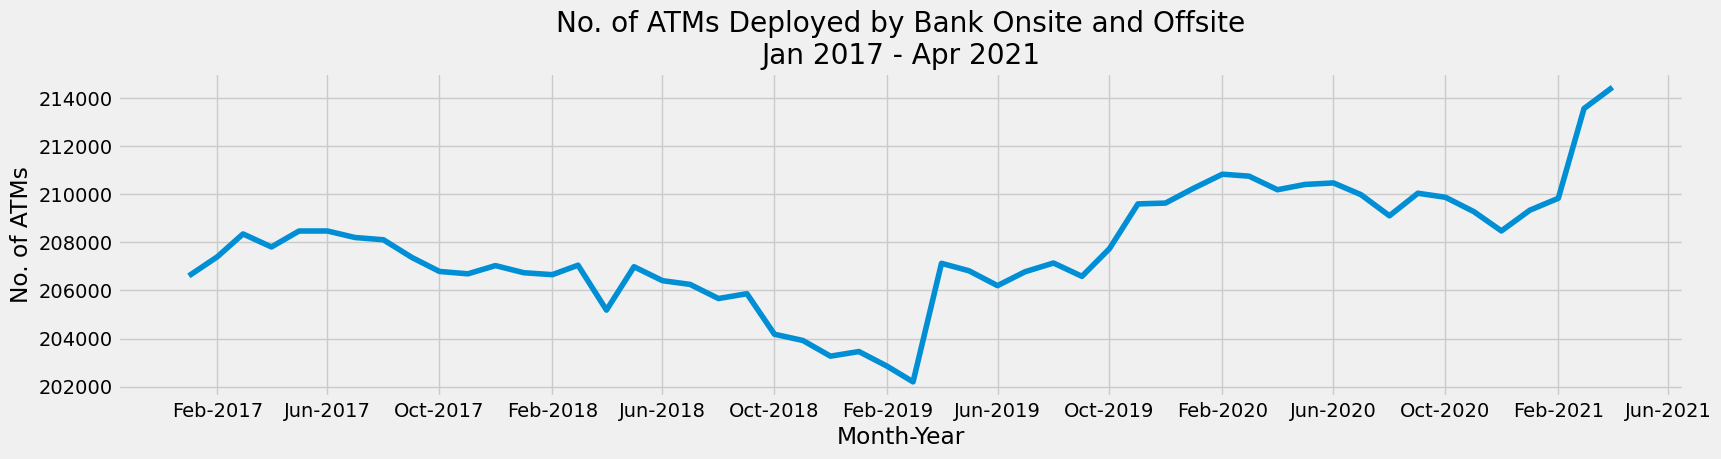

In [272]:
# No. of ATMS

plt.style.use('fivethirtyeight')

x_values = new_final_df.index
y_values = new_final_df["no_atms_on_site"] + new_final_df["no_atms_off_site"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="No. of ATMs",
       title="No. of ATMs Deployed by Bank Onsite and Offsite\nJan 2017 - Apr 2021")

**There looks to be an increasing trend in the number of ATMs deployed by banks onsite and offsite over the period of time, but there doesn't look like to be any trend in pre-covid, lockdown and post-lockdown stages**

**5.3.2 No. of POS Deployed Online**

[Text(0, 0.5, 'No. of POS'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'No. of POS Deployed by Bank Online\nJan 2017 - Apr 2021')]

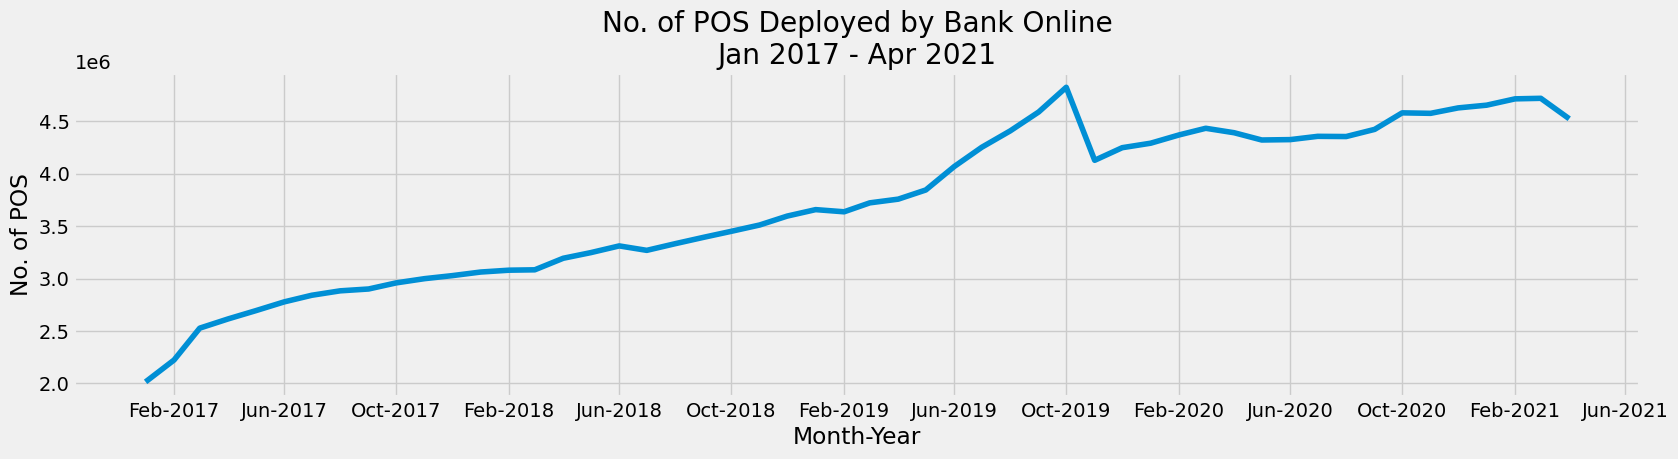

In [282]:
# No. of POS Online

plt.style.use('fivethirtyeight')

x_values = new_final_df.index
y_values = new_final_df["no_pos_on_line"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="No. of POS",
       title="No. of POS Deployed by Bank Online\nJan 2017 - Apr 2021")

**There looks to be an increasing trend in the number of POS deployed by banks online over the period of time, but there doesn't look like to be any trend in pre-covid, lockdown and post-lockdown stages**

[Text(0, 0.5, 'No. of Credit Card Transactions'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'No. of Credit Card Transactions via ATM and POS\nJan 2017 - Apr 2021')]

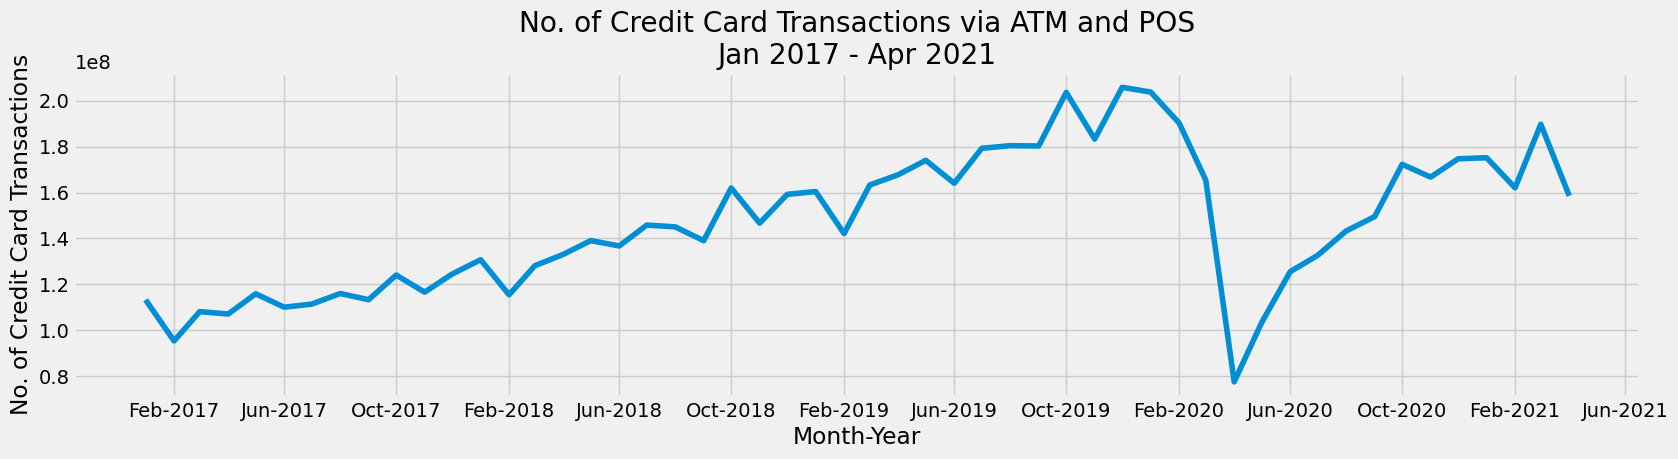

In [274]:
# No. of Credit Card Transactions

plt.style.use('fivethirtyeight')

x_values = new_final_df.index
y_values = new_final_df["no_credit_card_atm_txn"] + new_final_df["no_credit_card_pos_txn"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="No. of Credit Card Transactions",
       title="No. of Credit Card Transactions via ATM and POS\nJan 2017 - Apr 2021")


**It is clearly visible from above graph that the No. of Credit Transactions via ATM and POS sharply declined in Lockdown i.e. April and May 2020 and then Gradually started to increase in unlock stages**

[Text(0, 0.5, 'Credit Card Transaction Value (In Lacs)'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'Credit Card Transaction Value via ATM and POS\nJan 2017 - Apr 2021')]

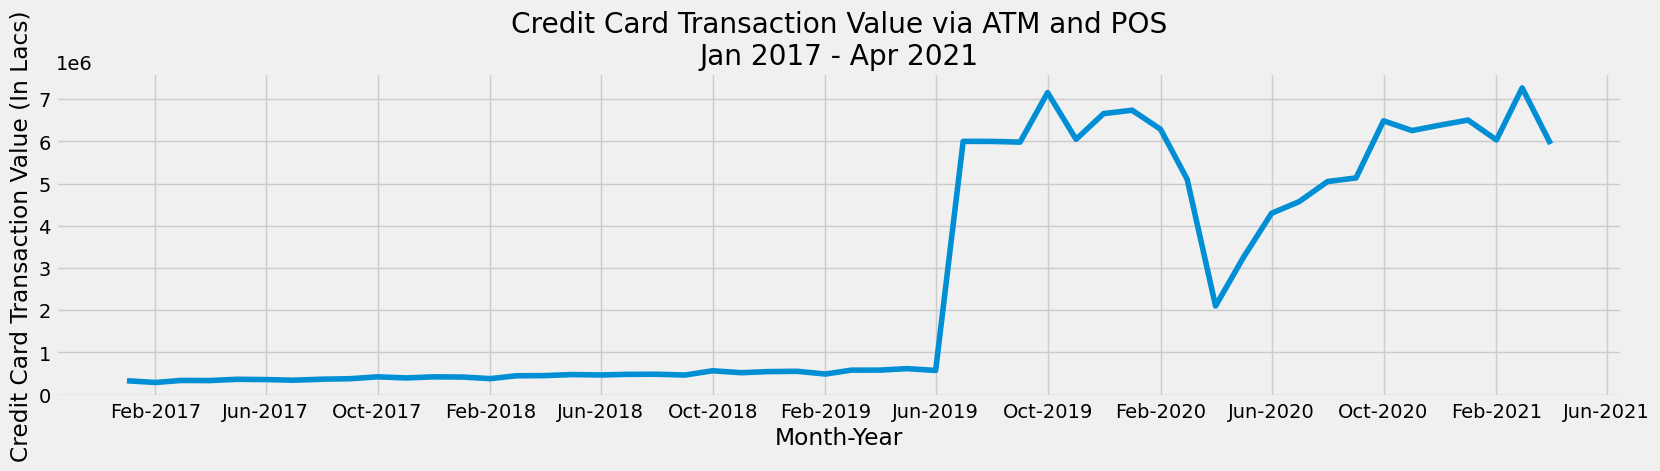

In [277]:
# Credit Card Transaction Value

plt.style.use('fivethirtyeight')

x_values = new_final_df.index
y_values = new_final_df["no_credit_card_atm_txn_value_in_lacs"] + new_final_df["no_credit_card_pos_txn_value_in_lacs"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="Credit Card Transaction Value (In Lacs)",
       title="Credit Card Transaction Value via ATM and POS\nJan 2017 - Apr 2021")

**It is clearly visible from above graph that the Credit Card Transactional Value via ATM and POS increased sharply from June 2019 and then declined during Lockdown i.e. April and May 2020 and then Gradually started to increase in unlock stages**

[Text(0, 0.5, 'No. of Debit Card Transactions'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'No. of Debit Card Transactions via ATM and POS\nJan 2017 - Apr 2021')]

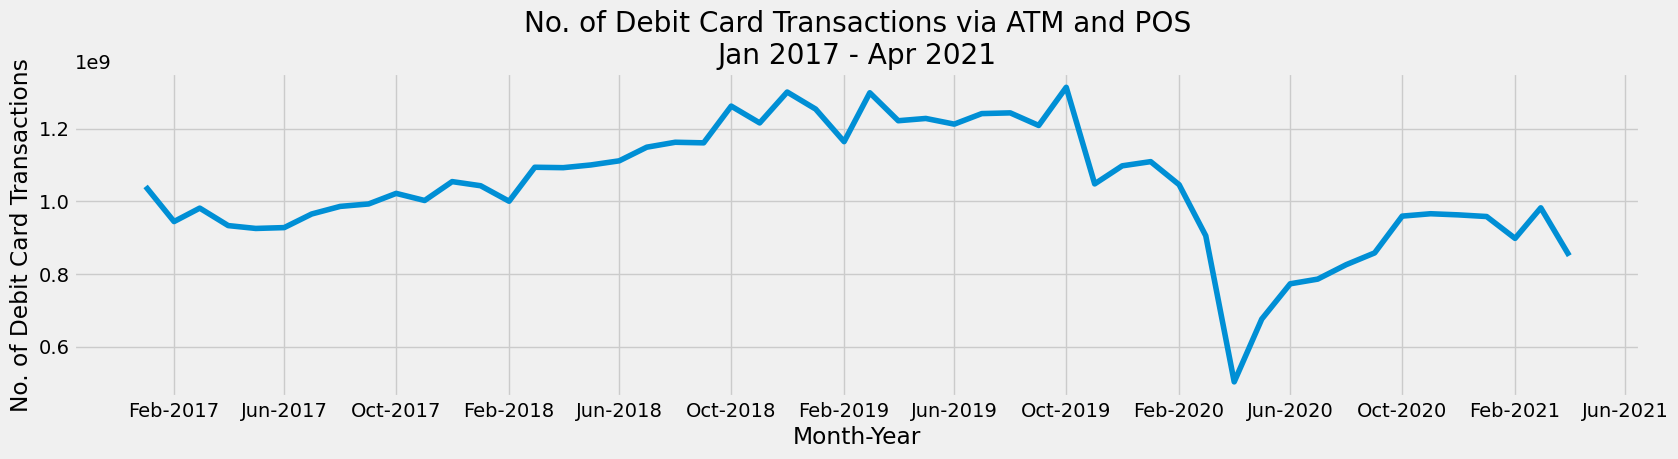

In [275]:
# No. of Debit Card Transactions

plt.style.use('fivethirtyeight')

x_values = new_final_df.index
y_values = new_final_df["no_debit_card_atm_txn"] + new_final_df["no_debit_card_pos_txn"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="No. of Debit Card Transactions",
       title="No. of Debit Card Transactions via ATM and POS\nJan 2017 - Apr 2021")

**It is clearly visible from above graph that the No. of Debit Transactions via ATM and POS sharply declined in Lockdown i.e. April and May 2020 and then Gradually started to increase in unlock stages**

[Text(0, 0.5, 'No. of NEFT Debit Transactions'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'No. of NEFT Debit Transactions\nJan 2017 - Apr 2021')]

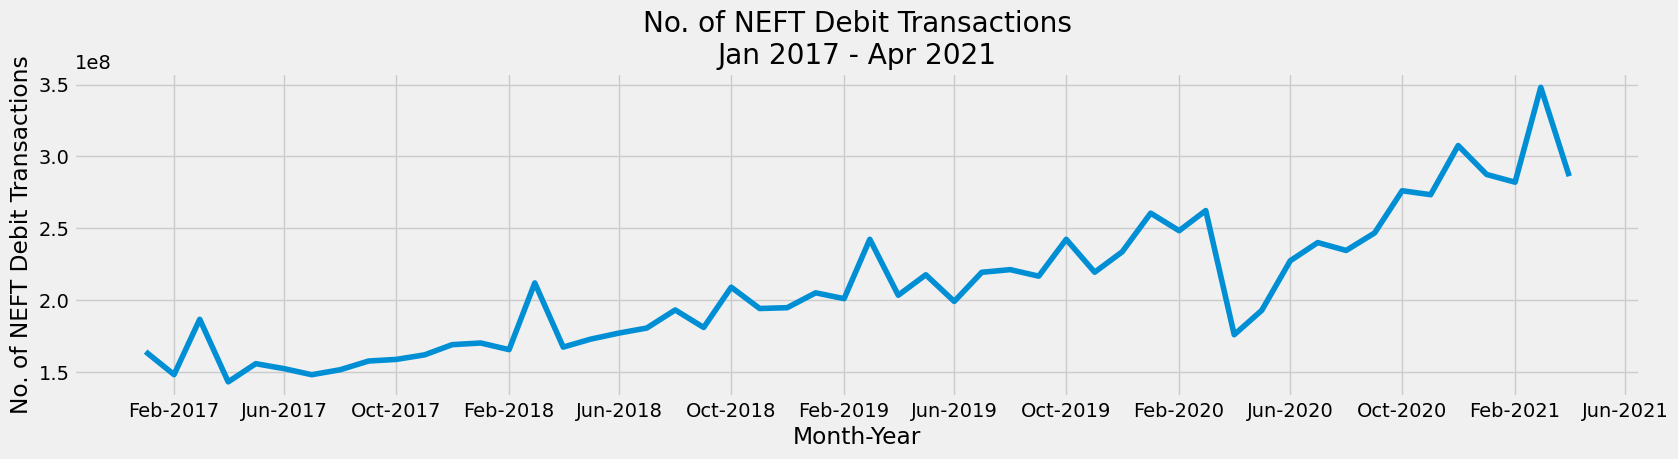

In [278]:
# No. of NEFT Debit Transactions

plt.style.use('fivethirtyeight')

x_values = new_final_df.index
y_values = new_final_df["no_debit_tx"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="No. of NEFT Debit Transactions",
       title="No. of NEFT Debit Transactions\nJan 2017 - Apr 2021")

**It is clearly visible from above graph that No. of NEFT Debit Transactions saw a dip in April and May 2020 and then gradually picked in unlock stages**

[Text(0, 0.5, 'Value. of NEFT Debit Transactions'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'Value of NEFT Debit Transactions (in mns)\nJan 2017 - Apr 2021')]

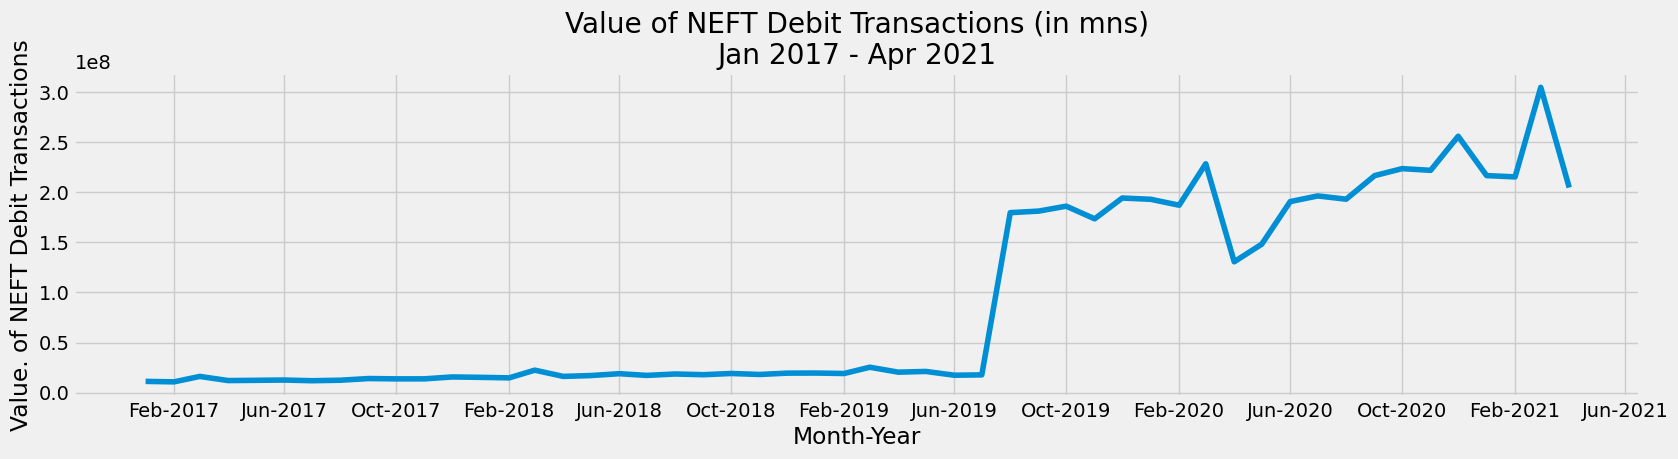

In [279]:
# No. of NEFT Transactions Value

plt.style.use('fivethirtyeight')

x_values = new_final_df.index
y_values = new_final_df["amt_debit_tx"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="Value. of NEFT Debit Transactions",
       title="Value of NEFT Debit Transactions (in mns)\nJan 2017 - Apr 2021")

**It is clearly visible from above graph that Value of NEFT Debit Transactions increased sharply from June 2019 and then declined during Lockdown i.e. April and May 2020 and then Gradually started to increase in unlock stages**

[Text(0, 0.5, 'No. of Total RTGS Credit Transactions'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'No. of Total RTGS Credit Transactions\nJan 2017 - Apr 2021')]

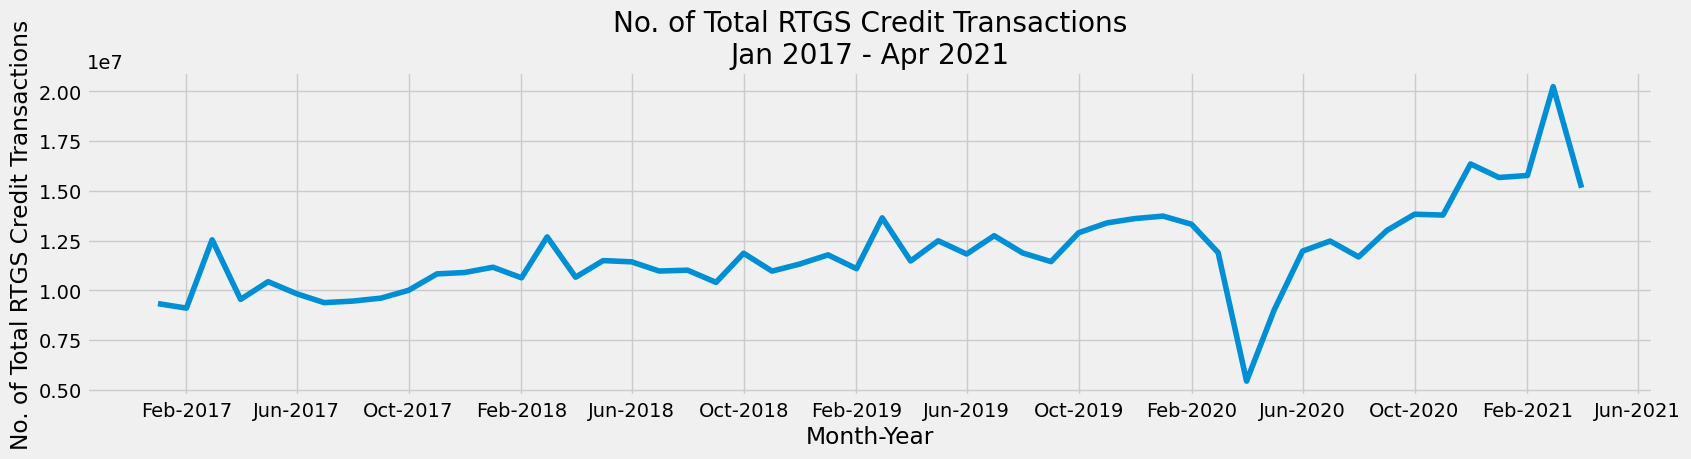

In [280]:
x_values = new_final_df.index
y_values = new_final_df["no_credit_tx_interbank"] + new_final_df["no_credit_tx_custmr"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="No. of Total RTGS Credit Transactions",
       title="No. of Total RTGS Credit Transactions\nJan 2017 - Apr 2021")

**Above Graph shows that No. of Total RTGS Credit Transactions declined sharply in lockdown stage and then increased gradually**

[Text(0, 0.5, 'Value of RTGS Debit Transactions'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'Value of RTGS Debit Transactions(in Cr)\nJan 2017 - Apr 2021')]

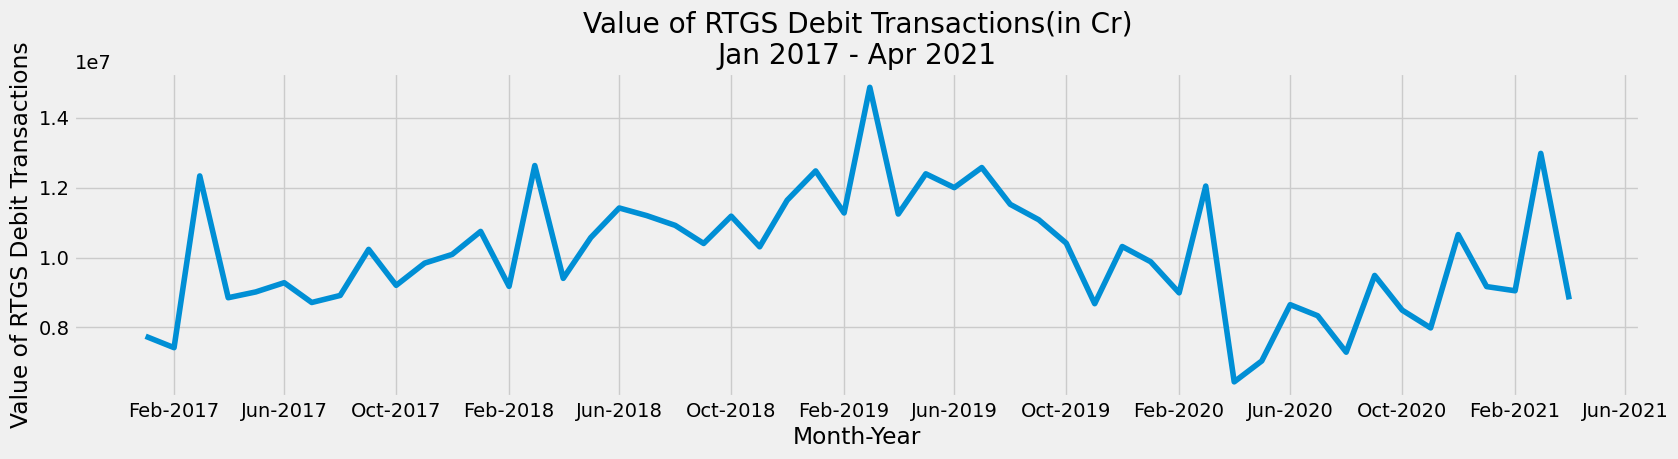

In [281]:
x_values = new_final_df.index
y_values = new_final_df["amt_debit_tx_interbank_in_cr"] + new_final_df["amt_debit_tx_custmr_in_cr"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="Value of RTGS Debit Transactions",
       title="Value of RTGS Debit Transactions(in Cr)\nJan 2017 - Apr 2021")

**There doesn't look like to be a specific pattern in value of RTGS Debit Transactions, but the value of transactions declined in lockdown stages**

[Text(0, 0.5, 'Precipitation (inches)'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'Trend : No. of Mobile Transactions\nJan 2017 - Apr 2021')]

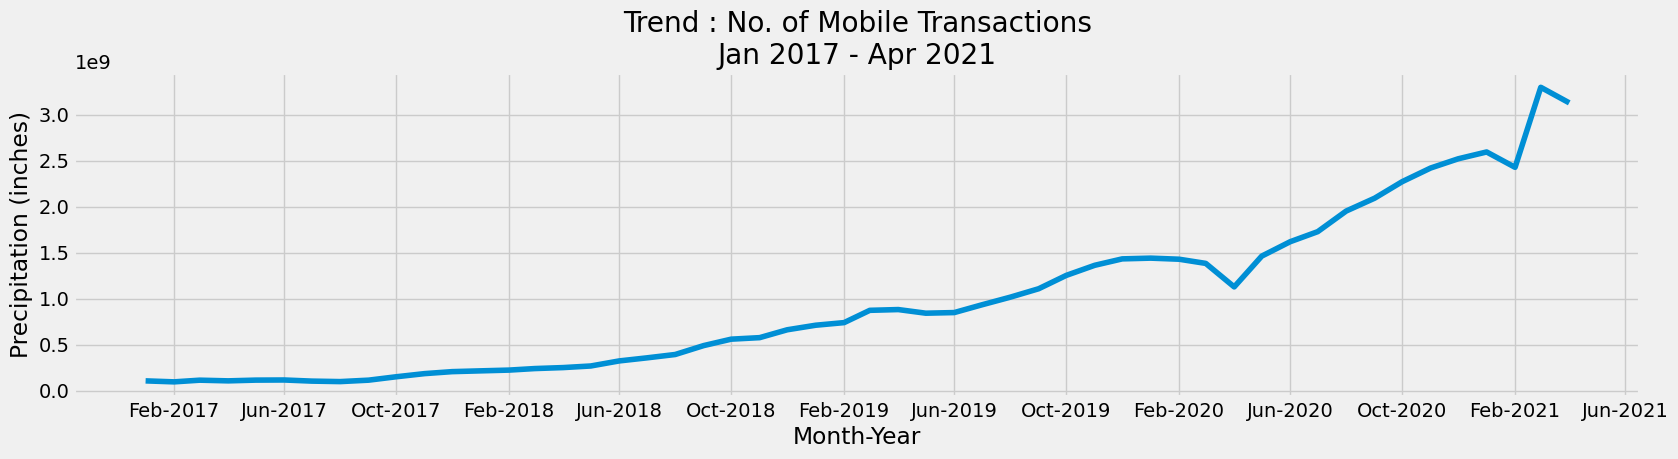

In [269]:
# No. of Mobile Transactions

x_values = new_final_df.index
y_values = new_final_df["no_mobile_tx"]

fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values, y_values)

# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="Precipitation (inches)",
       title="Trend : No. of Mobile Transactions\nJan 2017 - Apr 2021")

**In above plot we can see that the No. of Mobile Transactions have increased gradually and dipped a bit in Lockdown stages**

**6. Time Series Forecasting**

**6.1 Take the Data from Pre-covid as Train and Post-covid as Test and Let us see how the Trend should have been**

In [9]:
train_df = new_final_df.loc[:"2020-03-01",["no_credit_card_atm_txn","no_credit_card_pos_txn"]]
train_df = train_df["no_credit_card_atm_txn"] + train_df["no_credit_card_pos_txn"]
train_df = pd.DataFrame(train_df,columns=["Actual Values"])
train_df.tail()

,Actual Values
Date,
2019-11-01,183293425
2019-12-01,205860609
2020-01-01,203783554
2020-02-01,190299626
2020-03-01,165424952


In [10]:
test_df = new_final_df.loc["2020-04-01":,["no_credit_card_atm_txn","no_credit_card_pos_txn"]]
test_df = test_df["no_credit_card_atm_txn"] + test_df["no_credit_card_pos_txn"]
test_df = pd.DataFrame(test_df,columns=["Actual Values"])
test_df.head()

,Actual Values
Date,
2020-04-01,77492589
2020-05-01,103405942
2020-06-01,125494454
2020-07-01,132651314
2020-08-01,143265274


In [11]:
train = train_df.values.reshape((39,1))
test = test_df.values.reshape((13,1))

**6.2 Feature Scaling**

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [23]:
scaled_train

array([[0.16191117],
       [0.        ],
       [0.11536629],
       [0.1059579 ],
       [0.18574334],
       [0.13280301],
       [0.14501065],
       [0.18672916],
       [0.16230554],
       [0.25964346],
       [0.19217568],
       [0.2636151 ],
       [0.32010452],
       [0.18181349],
       [0.29615018],
       [0.34110353],
       [0.39533814],
       [0.37439867],
       [0.45660986],
       [0.44964578],
       [0.39526049],
       [0.60286458],
       [0.46417463],
       [0.57792618],
       [0.5888921 ],
       [0.42329491],
       [0.61463801],
       [0.65546035],
       [0.71208101],
       [0.62161815],
       [0.7594828 ],
       [0.76988732],
       [0.76859687],
       [0.97992981],
       [0.79579106],
       [1.        ],
       [0.98120487],
       [0.8591897 ],
       [0.63410043]])

**6.3 Using LSTM**

In [13]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
# find the end of this pattern
        end_ix = i + n_features
# check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
# gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [14]:
# define input sequence
timeseries_data = scaled_test
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [15]:
print(X),print(y)

[[[-0.16159366]
  [ 0.07289454]
  [ 0.27277202]]

 [[ 0.07289454]
  [ 0.27277202]
  [ 0.33753397]]

 [[ 0.27277202]
  [ 0.33753397]
  [ 0.43357898]]

 [[ 0.33753397]
  [ 0.43357898]
  [ 0.48996282]]

 [[ 0.43357898]
  [ 0.48996282]
  [ 0.6962019 ]]

 [[ 0.48996282]
  [ 0.6962019 ]
  [ 0.64583647]]

 [[ 0.6962019 ]
  [ 0.64583647]
  [ 0.71812017]]

 [[ 0.64583647]
  [ 0.71812017]
  [ 0.72221005]]

 [[ 0.71812017]
  [ 0.72221005]
  [ 0.60386339]]

 [[ 0.72221005]
  [ 0.60386339]
  [ 0.85423605]]]
[[0.33753397]
 [0.43357898]
 [0.48996282]
 [0.6962019 ]
 [0.64583647]
 [0.71812017]
 [0.72221005]
 [0.60386339]
 [0.85423605]
 [0.57216111]]


(None, None)

In [16]:
X.shape

(10, 3, 1)

In [18]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(10, 3, 1)

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [21]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 0.3829
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 0.3755
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 0.3682
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 0.3611
Epoch 5/300
1/1 [==============================] - 0s 8ms/step - loss: 0.3541
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 0.3470
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 0.3398
Epoch 8/300
1/1 [==============================] - 0s 8ms/step - loss: 0.3325
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 0.3253
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 0.3180
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 0.3106
Epoch 12/300
1/1 [==============================] - 0s 9ms/step - loss: 0.3031
Epoch 13/300
1/1 [==============================] - 0s 10ms

1/1 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 105/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 106/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 107/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 108/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 109/300
1/1 [==============================] - 0s 11ms/step - loss: 0.0080
Epoch 110/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 111/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 112/300
1/1 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 113/300
1/1 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 114/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 115/300
1/1 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 116/300
1/1 [==============================]

1/1 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 205/300
1/1 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 206/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 207/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 208/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 209/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 210/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 211/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 212/300
1/1 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 213/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 214/300
1/1 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 215/300
1/1 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 216/300
1/1 [==============================] -

In [26]:
# demonstrate prediction for next 10 days
x_input = np.array([0.98120487, 0.8591897, 0.63410043])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<13):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)


[0.79872626]
1 day input [0.8591897  0.63410043 0.79872626]
1 day output [[0.7495944]]
2 day input [0.63410043 0.79872626 0.74959439]
2 day output [[0.7200399]]
3 day input [0.79872626 0.7495944  0.7200399 ]
3 day output [[0.74698824]]
4 day input [0.7495944  0.7200399  0.74698824]
4 day output [[0.7336036]]
5 day input [0.7200399  0.74698824 0.7336036 ]
5 day output [[0.7299643]]
6 day input [0.74698824 0.7336036  0.7299643 ]
6 day output [[0.7337764]]
7 day input [0.7336036 0.7299643 0.7337764]
7 day output [[0.7305364]]
8 day input [0.7299643 0.7337764 0.7305364]
8 day output [[0.73004705]]
9 day input [0.7337764  0.7305364  0.73004705]
9 day output [[0.730393]]
10 day input [0.7305364  0.73004705 0.730393  ]
10 day output [[0.72962546]]
11 day input [0.73004705 0.730393   0.72962546]
11 day output [[0.72951216]]
12 day input [0.730393   0.72962546 0.72951216]
12 day output [[0.7294703]]
[0.79872626, 0.7495944, 0.7200399, 0.74698824, 0.7336036, 0.7299643, 0.7337764, 0.7305364, 0.730

In [27]:
scaled_test

array([[-0.16159366],
       [ 0.07289454],
       [ 0.27277202],
       [ 0.33753397],
       [ 0.43357898],
       [ 0.48996282],
       [ 0.6962019 ],
       [ 0.64583647],
       [ 0.71812017],
       [ 0.72221005],
       [ 0.60386339],
       [ 0.85423605],
       [ 0.57216111]])

In [28]:
lst_output

[0.79872626,
 0.7495944,
 0.7200399,
 0.74698824,
 0.7336036,
 0.7299643,
 0.7337764,
 0.7305364,
 0.73004705,
 0.730393,
 0.72962546,
 0.72951216,
 0.7294703]

In [29]:
import matplotlib.pyplot as plt

In [30]:
len(scaled_train)

39

In [31]:
day_new=np.arange(1,40)
day_pred=np.arange(40,53)

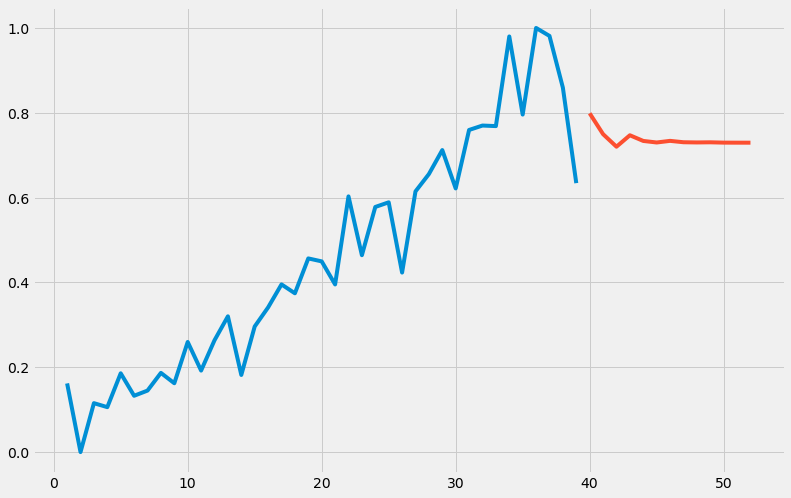

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(day_new,scaled_train)
plt.plot(day_pred,lst_output)

In [49]:
actual_data = np.concatenate([scaled_train,scaled_test])
preds = np.concatenate([scaled_train,np.array(lst_output).reshape((13,1))])

[Text(0, 0.5, 'No. of Credit Card Transactions'),
 Text(0.5, 0, 'Month-Year'),
 Text(0.5, 1.0, 'Time Series Forecasting : Total Number of Credit Card Transactions')]

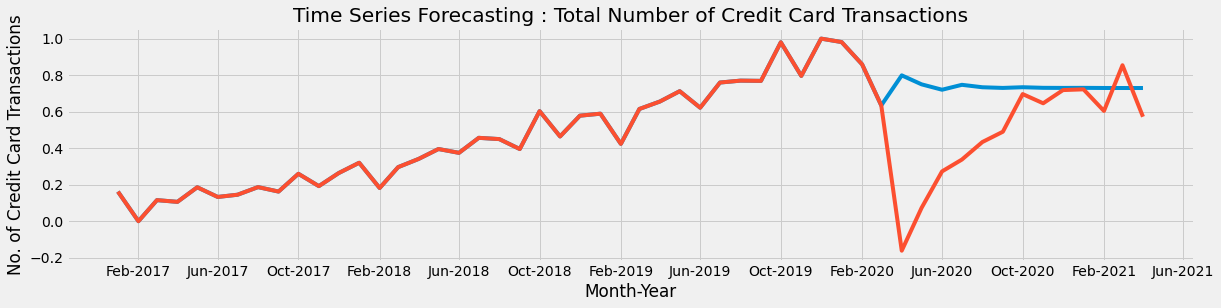

In [55]:
x_values = new_final_df.index


fig, ax = plt.subplots(figsize=(18,4))
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

plt.plot(x_values,preds)
plt.plot(x_values,actual_data)


# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)


# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


# Set title and labels for axes
ax.set(xlabel="Month-Year",
       ylabel="No. of Credit Card Transactions",
       title="Time Series Forecasting : Total Number of Credit Card Transactions")

**7. Miscellaneous - Analysis at Bank Level**

The problem in direct analysis is that there is difference in how Bank names are recorded in RTGS, POS and NEFT dataset. Hence to analyze the data at Bank level, we need to first map the various variations in names of a bank into a standardized name

In [547]:
# POS Data

os.chdir(pos_path)
pos_files = os.listdir()
pos_files

pos_dataframes = []
for f in pos_files:
    pos_dataframes.append(pd.read_excel(f,header=7,usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],index_col=0))
    
# drop all of the rows having null values

for i in pos_dataframes:
    i.dropna(how="all",inplace=True)
    
# drop the last row of the dataframe

for i in pos_dataframes:
    i.drop(i.tail(1).index,inplace=True)
    
# Reset the index of dataframe

for i in pos_dataframes:
    i.reset_index(inplace=True)

    
# rename the columns of dataframes

columns_map = ["bank_name","no_atms_on_site","no_atms_off_site","no_pos_on_line","no_pos_off_line",
               "no_credit_cards","no_credit_card_atm_txn","no_credit_card_pos_txn","no_credit_card_atm_txn_value_in_lacs","no_credit_card_pos_txn_value_in_lacs",
               "no_debit_cards","no_debit_card_atm_txn","no_debit_card_pos_txn","no_debit_card_atm_txn_value_in_lacs","no_debit_card_pos_txn_value_in_lacs"]

for i in pos_dataframes:
    i.columns = columns_map
    
#Standardize the Banks name in Proper case

for i in pos_dataframes:
    i["bank_name"] = i["bank_name"].str.title()

In [548]:
pos_dataframes[0]

,bank_name,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_lacs,no_credit_card_pos_txn_value_in_lacs,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_lacs,no_debit_card_pos_txn_value_in_lacs
0,Bank Of Baroda,6307.0,4212.0,91863.0,0.0,132768.0,6337.0,356634.0,22.198550,1042.953766,44732042.0,15121682.0,8391734.0,66622.009957,9684.416343
1,Bank Of India,3487.0,4230.0,21151.0,0.0,145860.0,11565.0,193142.0,62.580745,481.127713,47655682.0,26705533.0,7428242.0,58887.284536,8194.946552
2,Bank Of Maharashtra,1291.0,588.0,1002.0,0.0,0.0,0.0,0.0,0.000000,0.000000,6513165.0,5251298.0,2077018.0,20283.540760,2894.972365
3,Canara Bank,5397.0,5142.0,12201.0,0.0,214874.0,27163.0,409797.0,123.001323,822.632450,34526960.0,16528473.0,7875214.0,69951.427126,11023.421992
4,Central Bank Of India,3482.0,1810.0,2347.0,0.0,112601.0,2873.0,155344.0,14.660914,342.104322,24621985.0,9628241.0,3504219.0,42016.480412,4844.843125
5,Corporation Bank,2315.0,861.0,114360.0,0.0,97029.0,1866.0,145119.0,8.825874,348.799363,11636410.0,5289245.0,3521171.0,22733.117100,4392.722224
6,Dena Bank,1290.0,248.0,4979.0,0.0,0.0,0.0,0.0,0.000000,0.000000,7023866.0,2211982.0,733674.0,9209.514477,951.680782
7,Indian Bank,2568.0,657.0,11044.0,0.0,82656.0,2641.0,145215.0,15.500000,318.000000,17762656.0,24779009.0,5146258.0,41293.300000,5242.000000
8,Indian Overseas Bank,2636.0,893.0,13178.0,0.0,43550.0,508.0,61453.0,2.129569,166.057091,16200877.0,11724767.0,2193739.0,34958.442825,7509.111289
9,Oriental Bank Of Commerce,2291.0,320.0,7131.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10471291.0,4397936.0,1663653.0,19653.101000,2346.142000


In [560]:
neft_dataframes[0].head()

,Unnamed: 1,NO. OF TRANSACTIONS,AMOUNT (Rs. Million),NO. OF TRANSACTIONS.1,AMOUNT (Rs. Million).1
1.0,ABHYUDAYA CO-OP BANK LTD,66339.0,3203.883061,152773.0,4992.196786
2.0,ABU DHABI COMMERCIAL BANK,2222.0,1351.615008,625.0,697.650707
3.0,AHMEDABAD MERCANTILE COOP BANK,9117.0,645.821450,19117.0,1291.687553
4.0,AIRTEL PAYMENTS BANK LIMITED,12334.0,389.555026,6905.0,15.983786
5.0,AKOLA DISTRICT CENTRAL CO-OP BANK,23637.0,1518.618644,15420.0,749.056647


In [552]:
# RTGS
#change directory to read files
os.chdir(rtgs_path)
rtgs__neft_files = os.listdir()
rtgs__neft_files


rtgs_dataframes = []
for f in rtgs__neft_files:
    rtgs_dataframes.append(pd.read_excel(f,header=4,index_col=0,sheet_name="RTGS"))

# drop the last row of the dataframe

for i in rtgs_dataframes:
    i.drop(i.tail(1).index,inplace=True)
    
rtgs_map = ["bank_name",
            "no_credit_tx_interbank","no_credit_tx_custmr","no_credit_tx_total","%_of_no_total_credit_tx",
            "amt_credit_tx_interbank_in_cr","amt_credit_tx_custmr_in_cr","amt_credit_tx_total_in_cr","%_of_amt_total_credit_tx",
            "no_debit_tx_interbank","no_debit_tx_custmr","no_debit_tx_total","%_of_no_total_debit_tx",
            "amt_debit_tx_interbank_in_cr","amt_debit_tx_custmr_in_cr","amt_debit_tx_total_in_cr","%_of_amt_total_debit_tx"]

for i in rtgs_dataframes:
    i.columns = rtgs_map
    
#Standardize the Banks name in Proper case

for i in rtgs_dataframes:
    i["bank_name"] = i["bank_name"].str.title()
    
rtgs_dataframes[0]

,bank_name,no_credit_tx_interbank,no_credit_tx_custmr,no_credit_tx_total,%_of_no_total_credit_tx,amt_credit_tx_interbank_in_cr,amt_credit_tx_custmr_in_cr,amt_credit_tx_total_in_cr,%_of_amt_total_credit_tx,no_debit_tx_interbank,no_debit_tx_custmr,no_debit_tx_total,%_of_no_total_debit_tx,amt_debit_tx_interbank_in_cr,amt_debit_tx_custmr_in_cr,amt_debit_tx_total_in_cr,%_of_amt_total_debit_tx
1.0,Abhyudaya Co-Operative Bank Ltd,54.0,5662.0,5716,0.059897,0.299084,37.371975,37.671059,0.042560,10.0,8293.0,8303.0,0.087005,0.308490,40.251039,40.559528,0.045824
2.0,Abu Dhabi Commercial Bank,12.0,197.0,209,0.002190,7.333883,9.021072,16.354955,0.018478,97.0,791.0,888.0,0.009305,6.200844,22.293966,28.494809,0.032193
3.0,Airtel Payments Bank Ltd.,8.0,NaN,8,0.000084,0.821285,NaN,0.821285,0.000928,6.0,18.0,24.0,0.000251,0.570085,0.728000,1.298085,0.001467
4.0,Allahabad Bank,6072.0,80380.0,86452,0.905913,142.312110,253.298670,395.610780,0.446956,6461.0,139227.0,145688.0,1.526635,153.454948,222.871162,376.326109,0.425169
5.0,Almora Urban Co-Operative Bank Ltd.,3.0,371.0,374,0.003919,0.000252,0.346831,0.347083,0.000392,NaN,1235.0,1235.0,0.012941,NaN,0.709838,0.709838,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191.0,Vijaya Bank,4848.0,65482.0,70330,0.736974,38.708775,171.573674,210.282449,0.237575,5454.0,94427.0,99881.0,1.046633,30.219292,194.229118,224.448410,0.253579
192.0,Westpac Banking Corporation,24.0,24.0,48,0.000503,0.835603,11.315851,12.151455,0.013729,23.0,28.0,51.0,0.000534,0.538522,12.477427,13.015949,0.014705
193.0,Woori Bank,22.0,216.0,238,0.002494,13.638862,4.049856,17.688718,0.019985,60.0,192.0,252.0,0.002641,14.975708,3.809501,18.785209,0.021223
194.0,Yes Bank Ltd,3164.0,188107.0,191271,2.004290,225.904057,1161.307289,1387.211346,1.567255,2248.0,210355.0,212603.0,2.227824,177.536004,1109.074709,1286.610712,1.453597


In [562]:
# Let us check the unique no. of banks in each POS and RTGS for first month's data

print(rtgs_dataframes[0]["bank_name"].nunique())
print(pos_dataframes[0]["bank_name"].nunique())

195
49


There is lot of variation in how names of various banks are captured in 3 datasets i.e. pos_dataframe, neft_dataframes and rtgs_dataframes. So extract the unqiue names from all dataframes and then use Fuzzy logic to map the names

In [565]:
#Extract the unique bank names

unique_bank_names = pd.concat([pd.Series(rtgs_dataframes[0]["bank_name"].unique()),
                               pd.Series(pos_dataframes[0]["bank_name"].unique())])
unique_bank_names.drop_duplicates(inplace=True)
# Count of Unique bank names 
unique_bank_names.shape

(220,)

**Use Fuzzy Logic**

In [576]:
combined_list = lis_unique_bank_names
grs = list() # groups of names with distance > 95
for name in combined_list:
     
    for g in grs:
        try:
            if all(fuzz.partial_ratio(name.lower(), w.lower()) > 95 for w in g):
                g.append(name)
                break
        except:
            continue
    else:
        grs.append([name, ])

print(len(grs))
print('output groups:', grs)

203
output groups: [['Abhyudaya Co-Operative Bank Ltd'], ['Abu Dhabi Commercial Bank'], ['Airtel Payments Bank Ltd.'], ['Allahabad Bank'], ['Almora Urban Co-Operative Bank Ltd.'], ['Andhra Bank'], ['Andhra Pradesh State Co-Operative Bank Ltd.'], ['Andhra Pragathi Grameena Bank'], ['Apna Sahakari Bank Ltd.'], ['Australia And New Zealand Banking Group Limited'], ['Axis Bank', 'Axis Bank Ltd'], ['Bandhan Bank Limited', 'Bandhan Bank'], ['Bank Of America Na', 'Bank Of America'], ['Bank Of Bahrain & Kuwait B S C'], ['Bank Of Baroda'], ['Bank Of Ceylon'], ['Bank Of India', 'Central Bank Of India'], ['Bank Of Maharashtra'], ['Barclays Bank Plc'], ['Bassein Catholic Co-Operative Bank Ltd.'], ['Bnp Paribas'], ['Canara Bank ', 'Canara Bank'], ['Capital Small Finance Bank Limited'], ['Catholic Syrian Bank Ltd'], ['Citi Bank N.A.', 'Citi Bank'], ['Citizen Credit Co-Op Bank Ltd.'], ['City Union Bank'], ['Cooperatieve Rabobank U.A.'], ['Corporation Bank'], ['Credit Agricole Corporate And Investment 

In [577]:
grs

[['Abhyudaya Co-Operative Bank Ltd'],
 ['Abu Dhabi Commercial Bank'],
 ['Airtel Payments Bank Ltd.'],
 ['Allahabad Bank'],
 ['Almora Urban Co-Operative Bank Ltd.'],
 ['Andhra Bank'],
 ['Andhra Pradesh State Co-Operative Bank Ltd.'],
 ['Andhra Pragathi Grameena Bank'],
 ['Apna Sahakari Bank Ltd.'],
 ['Australia And New Zealand Banking Group Limited'],
 ['Axis Bank', 'Axis Bank Ltd'],
 ['Bandhan Bank Limited', 'Bandhan Bank'],
 ['Bank Of America Na', 'Bank Of America'],
 ['Bank Of Bahrain & Kuwait B S C'],
 ['Bank Of Baroda'],
 ['Bank Of Ceylon'],
 ['Bank Of India', 'Central Bank Of India'],
 ['Bank Of Maharashtra'],
 ['Barclays Bank Plc'],
 ['Bassein Catholic Co-Operative Bank Ltd.'],
 ['Bnp Paribas'],
 ['Canara Bank ', 'Canara Bank'],
 ['Capital Small Finance Bank Limited'],
 ['Catholic Syrian Bank Ltd'],
 ['Citi Bank N.A.', 'Citi Bank'],
 ['Citizen Credit Co-Op Bank Ltd.'],
 ['City Union Bank'],
 ['Cooperatieve Rabobank U.A.'],
 ['Corporation Bank'],
 ['Credit Agricole Corporate And I

In [578]:
# Give each group's list a value which will be the first element of list of each group

def Extract(lst):
    return [item[0] for item in lst]
      
# Driver code
lst = grs
first_words = Extract(lst)
len(first_words)

203

In [579]:
mapping = {tuple(k): v for k, v in zip(grs, first_words)}
mapping

{('Abhyudaya Co-Operative Bank Ltd',): 'Abhyudaya Co-Operative Bank Ltd',
 ('Abu Dhabi Commercial Bank',): 'Abu Dhabi Commercial Bank',
 ('Airtel Payments Bank Ltd.',): 'Airtel Payments Bank Ltd.',
 ('Allahabad Bank',): 'Allahabad Bank',
 ('Almora Urban Co-Operative Bank Ltd.',): 'Almora Urban Co-Operative Bank Ltd.',
 ('Andhra Bank',): 'Andhra Bank',
 ('Andhra Pradesh State Co-Operative Bank Ltd.',): 'Andhra Pradesh State Co-Operative Bank Ltd.',
 ('Andhra Pragathi Grameena Bank',): 'Andhra Pragathi Grameena Bank',
 ('Apna Sahakari Bank Ltd.',): 'Apna Sahakari Bank Ltd.',
 ('Australia And New Zealand Banking Group Limited',): 'Australia And New Zealand Banking Group Limited',
 ('Axis Bank', 'Axis Bank Ltd'): 'Axis Bank',
 ('Bandhan Bank Limited', 'Bandhan Bank'): 'Bandhan Bank Limited',
 ('Bank Of America Na', 'Bank Of America'): 'Bank Of America Na',
 ('Bank Of Bahrain & Kuwait B S C',): 'Bank Of Bahrain & Kuwait B S C',
 ('Bank Of Baroda',): 'Bank Of Baroda',
 ('Bank Of Ceylon',): '